# <center> Goodreads Exploratory Data Analysis


## Background

Goodreads is a commonly used website among readers to catalog and review books users have read or are looking to read, this subsidiary of Amazon has acquired a user base of 90 million members as of July of 2019, making it one of the most popular book review sites on the interent. This large user base has the ability to create lists and hold votes on which titles should be included in the list based on user votes for the list's designated category such as: Most Popular Books, Best Fantasy or Best Books of the 20th century. 

The dataset we will be exploring has been pulled from kaggle: https://www.kaggle.com/zygmunt/goodbooks-10k

The goodbooks-10k dataset includes several csv files: books.csv, book_tags.csv, ratings.csv, tags.csv and to_read.csv. 

The books.csv includes 10,000 of the most popular books as voted on by Goodreads users, with most of the books having 100 reviews each. The ratings mentioned refer to star ratings and users can rate a book from one to five stars, five stars meaning they loved the book and would recomend the book to others. 

The tags.csv is a dataset where each user has created a unique tag for a book, these can be anything the user determines and does not necessarily fall into the strict genre categories most readers are used to like Fantasy, Sci-Fi or Non-Fiction.

This analysis will mainly look to explore the books.csv and ratings.csv files and attempt to determine what insights can be drawn from the books_dataset and the ratings dataset as defined below. 

# Cleaning the Goodreads dataset goodbooks-10k from Kaggle. 


In [102]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)


In [45]:
#initial import of goodreads Data
books_dataset = pd.read_csv("/mnt/c/Users/Prometheus-Desktop/Documents/Jupyter_Notebooks/Projects/datasets/Goodreads/archive/books.csv") 
ratings = pd.read_csv("/mnt/c/Users/Prometheus-Desktop/Documents/Jupyter_Notebooks/Projects/datasets/Goodreads/archive/ratings.csv") 

#additional files for further analysis
book_tags = pd.read_csv("/mnt/c/Users/Prometheus-Desktop/Documents/Jupyter_Notebooks/Projects/datasets/Goodreads/archive/book_tags.csv") 
user_tags = pd.read_csv("/mnt/c/Users/Prometheus-Desktop/Documents/Jupyter_Notebooks/Projects/datasets/Goodreads/archive/tags.csv") 
#books marked as to read by users
to_read = pd.read_csv("/mnt/c/Users/Prometheus-Desktop/Documents/Jupyter_Notebooks/Projects/datasets/Goodreads/archive/to_read.csv") 


### Examining the books_dataset 


In [46]:
# Information for books_datset i.e. books.csv
books_dataset.head()


,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [47]:
books_dataset.shape

(10000, 23)

In [48]:
books_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

### Examining The book_tags dataframe

In [49]:
# Book tags associated with a given book, a book can have multiple user tags given to it
print(book_tags.head()) 
print(book_tags.isnull().any())
book_tags.shape

   goodreads_book_id  tag_id   count
0                  1   30574  167697
1                  1   11305   37174
2                  1   11557   34173
3                  1    8717   12986
4                  1   33114   12716
goodreads_book_id    False
tag_id               False
count                False
dtype: bool


(999912, 3)

### Examining the ratings dataframe

In [50]:
# User ratings given to a specific book
print(ratings.head())
print(book_tags.shape) 
print(ratings.isnull().any())


   book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4
(999912, 3)
book_id    False
user_id    False
rating     False
dtype: bool


### Examining the user_tags dataframe

In [51]:
# Tags given by users given name
print(user_tags.tail())
user_tags.shape


       tag_id    tag_name
34247   34247   Ｃhildrens
34248   34248   Ｆａｖｏｒｉｔｅｓ
34249   34249       Ｍａｎｇａ
34250   34250      ＳＥＲＩＥＳ
34251   34251  ｆａｖｏｕｒｉｔｅｓ


(34252, 2)

## Cleaning up the Datasets


### Cleaning the Books Dataset

Drop the columns of no interest for analysis, the image_url columns.

In [52]:
books_dataset = books_dataset.drop(columns = ["image_url", "small_image_url"]) 
books_dataset.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


In [53]:
books_dataset.isnull().any()


id                           False
book_id                      False
best_book_id                 False
work_id                      False
books_count                  False
isbn                          True
isbn13                        True
authors                      False
original_publication_year     True
original_title                True
title                        False
language_code                 True
average_rating               False
ratings_count                False
work_ratings_count           False
work_text_reviews_count      False
ratings_1                    False
ratings_2                    False
ratings_3                    False
ratings_4                    False
ratings_5                    False
dtype: bool

We are going to drop the few rows containing null values in the books_dataset to make some of the further analysis cleaner, this should not skew the dataset too much as we have plenty of observations for the limited amount of analyses we are going to conduct on the books_dataset. 

In [54]:
books_dataset = books_dataset.dropna()


### Cleaning the Ratings Dataset


In [55]:
ratings = ratings.sort_values(["user_id", "book_id"]) 
ratings.head()


,book_id,user_id,rating
117889,1180,1,4
488112,4893,1,3
625717,6285,1,4
796318,8034,2,4
875008,8855,2,5


We know there are no null values to worry about from the above examination of the ratings dataset with .isnull().any() returning false for all of the categories, but we still need to worry about duplicates in case a user has managed to rate a book more than once.

In [56]:
#Are there duplicate ratings? 

ratings.duplicated(['user_id', 'book_id']).sum()

2278

There are 2,278 duplicate user ratings in the given dataset, so somehow certain users were able to give the same book multiple ratings which if left in the dataset will skew our analysis of the ratings datset. 

In [57]:
#Create a dataset containing all of the duplications for further inspection
dupes = ratings[ratings.duplicated(['user_id', 'book_id'])].sort_values('user_id') 
dupes.head()

,book_id,user_id,rating
459829,4608,7,2
883646,8946,16,3
702003,7063,17,5
613365,6160,25,4
883649,8946,25,5


Lets isolate a user from the duplicates dataset created and examine their ratings from the full ratings dataset and see which books they have rated more than once.\
For this case user_id 16 was chosen as shown below:

In [58]:
#User 16 has rated book 8946 twice somehow
dupe_for_user_16 = ratings[ratings['user_id'] == 16] 
dupe_for_user_16.sort_values('book_id')

,book_id,user_id,rating
613362,6160,16,4
673669,6772,16,3
877620,8882,16,3
883645,8946,16,5
883646,8946,16,3
931736,9460,16,5
968640,9858,16,4


#### Drop the duplicates from the ratings dataset


As seen above the user 16 was able to rate the book with id 8946 twice, and 2,278 other users were able to duplicate their ratings on books, to fix this we are going to drop all of the duplicates in the ratings dataset and create a ratings_final dataframe with only one rating per book_id for each user.

In [59]:
ratings_final = ratings.drop_duplicates(subset = ['user_id', 'book_id'], keep = 'first')
ratings_final.shape



(979478, 3)

In [60]:
ratings_final[ratings_final['user_id'] == 16].sort_values('book_id')

,book_id,user_id,rating
613362,6160,16,4
673669,6772,16,3
877620,8882,16,3
883645,8946,16,5
931736,9460,16,5
968640,9858,16,4


We can now see in the above table that user 16 has only rated book_id 8946 the one time. 


# Exploration of the Ratings Dataset

## Distribution of the Goodreads Ratings 

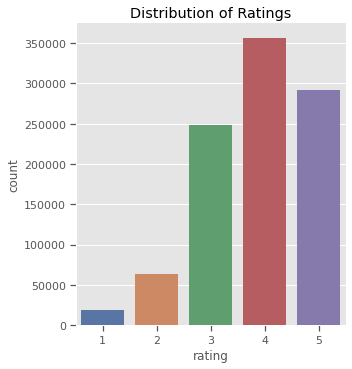

In [61]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

%matplotlib inline

sns.set_context('notebook')
style.use('ggplot')
sns.set_palette('deep')


sns.catplot(x='rating', data=ratings_final,kind='count')
plt.title('Distribution of Ratings')
plt.show()

The ratings dataset is left skewed with most of the ratings falling in the 3-5 range and with very few falling in the 1-2 range. This is not entirely surprising as most people who are willing to take the time to rate a book will have probably liked it enough to justify a 3 star rating, while the people who truly dislike a book likely end up putting the book down long before finishing it and therefore rarely take the time to go and rate it on goodreads.

In [62]:
ratings_final.head(10)

,book_id,user_id,rating
117889,1180,1,4
488112,4893,1,3
625717,6285,1,4
796318,8034,2,4
875008,8855,2,5
959821,9762,2,4
890007,9014,3,1
893311,9049,3,1
326891,3273,4,2
346433,3469,4,5


## Number of Ratings Each User has made 

Lets continue to examine the ratings dataset and proceed to look at the number of books each user has managed to rate over their time on the Goodreads platform. This can be accomplished by grouping each user_id and counting the number of ratings they have made on books over their time spent reviewing on Goodreads.

In [63]:
ratings_by_user = ratings_final.groupby(['user_id'])['rating'].count() #.to_frame('n_books_rated').reset_index()
ratings_by_user

user_id
1         3
2         3
3         2
4         3
5         5
         ..
53420     6
53421     8
53422    18
53423     2
53424    16
Name: rating, Length: 53424, dtype: int64

In [64]:
ratings_by_user.describe()

count    53424.000000
mean        18.334045
std         26.224647
min          1.000000
25%          3.000000
50%          8.000000
75%         22.000000
max        200.000000
Name: rating, dtype: float64

The mean number of ratings a user has made on Goodreads is 18.33 with a median of 8, meaning at least half the population of users on Goodreads have rated 8 books or less. We can see that the data is being influenced by outliers in this case and can verify that the data is right skewed, the ratings dataset has a right sided tail, by looking at the figure below with the Number of Ratings per User; There is a subset of users who have rated far more books than one would expect from a typical Goodreads user. 

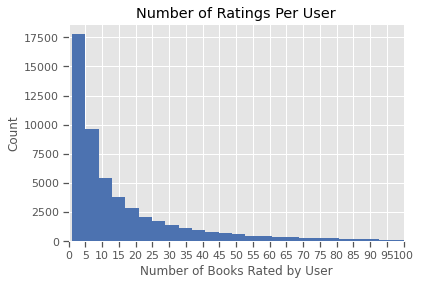

In [65]:
fig, ax = plt.subplots()
plt.hist(ratings_by_user, bins=50)
ax.set(xlim=[0,100])
ax.xaxis.set(ticks=range(0,100+1,5))
ax.set(title='Number of Ratings Per User', ylabel='Count', xlabel ='Number of Books Rated by User')
plt.show()

## Average Rating Each User Gave to Books

In [66]:
avg_ratings_by_user = ratings_final.groupby(['user_id'])['rating'].mean()
avg_ratings_by_user.describe()

count    53424.000000
mean         3.876747
std          0.621924
min          1.000000
25%          3.500000
50%          3.911765
75%          4.333333
max          5.000000
Name: rating, dtype: float64

When each users ratings are grouped together we can get a sense for how they tend to rate books, do they rate every book five stars or do their ratings vary from book to book. We can see that the average user rating as a whole from the dataset is around 3.88, users tend to rate books  highly per the ratings we have analyzed with few to no one star ratings.

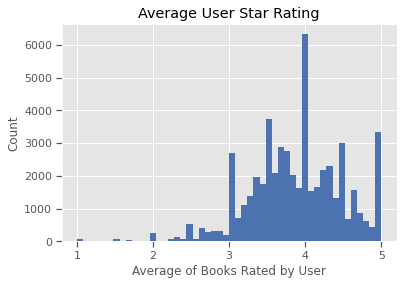

In [67]:
fig, ax = plt.subplots()
plt.hist(avg_ratings_by_user, bins=50)
ax.xaxis.set(ticks=range(1,6,1))
ax.set(title='Average User Star Rating', ylabel='Count', xlabel ='Average of Books Rated by User')
plt.show()

From the figure above we can see that some Goodreads users do tend to rate most of the books they've read at the same value, meaning they tend to be a 4 or 5 star rater for every book read. This can be inferred from the spikes right at 3, 4, and 5 meaning their star ratings dont tend to shift around by much, these raters either really like all of the books they read and rate them as such or they tend to only rate books they've liked.

The ratings come down to user preferences and how they've chosen to use Goodreads, some may only be using it as a catalog of their favorite books and review as such, while others may be using the site more seriously as a recommendation engine and rate their books on a more accurate scale for themselves to enhance the site's generated recommendations.

## Number of ratings Per Book

Lets look at the number of ratings each book in the dataset has: 

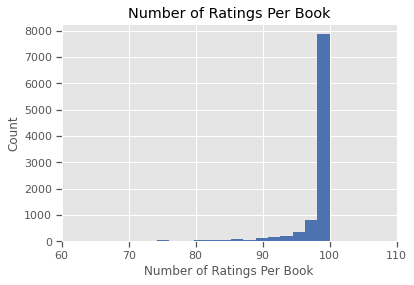

In [68]:
ratings_per_book = ratings_final.groupby(['book_id'])['rating'].count()

fig, ax = plt.subplots()
plt.hist(ratings_per_book, bins=50)
ax.set(xlim=[60,110])
#ax.xaxis.set(ticks=range(0,100+1,5))
ax.set(title='Number of Ratings Per Book', ylabel='Count', xlabel ='Number of Ratings Per Book')
plt.show()

In [69]:
ratings_per_book.describe()

count    10000.000000
mean        97.947800
std          5.759322
min          8.000000
25%         99.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: rating, dtype: float64

# Exploration of the books_dataset

In [70]:
books_dataset.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


We can find the most read books, in this case meaning the most rated books by sorting the books_dataset on the ratings_count column. Here we are classifying most read as equivalent to most rated.

We can also find the books readers seem to love the most by sorting for the highest average_rating and we will classify this as the most beloved books. 

## Most Read Books

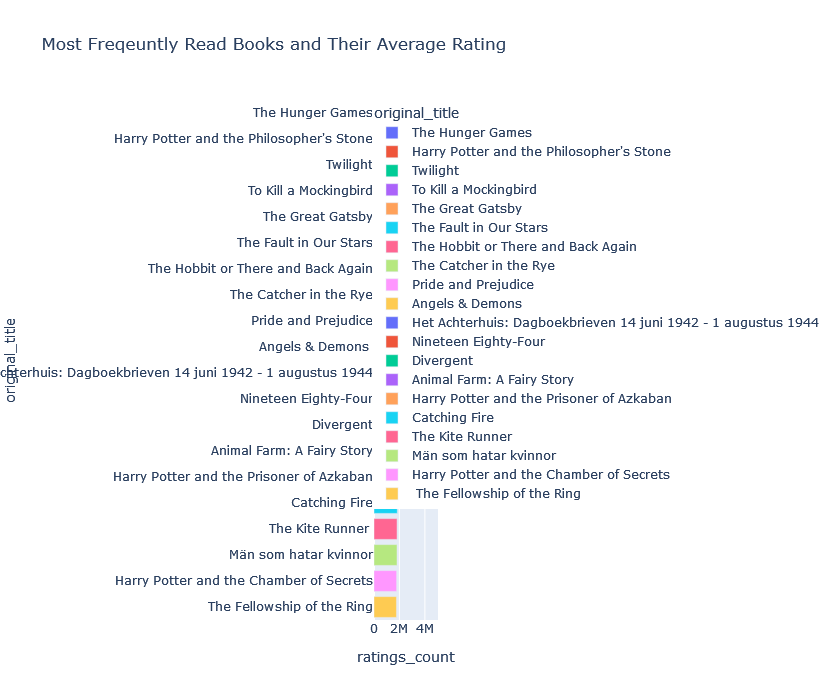

In [71]:
import plotly.express as px

most_rated = books_dataset.sort_values('ratings_count', ascending=False)
most_rated_20 = most_rated[0:20]

fig = px.bar(most_rated_20, x="ratings_count", y="original_title", title='Most Freqeuntly Read Books and Their Average Rating',
             orientation='h', color='original_title', width=1500, height=700)
fig.show()


## Most Beloved Books

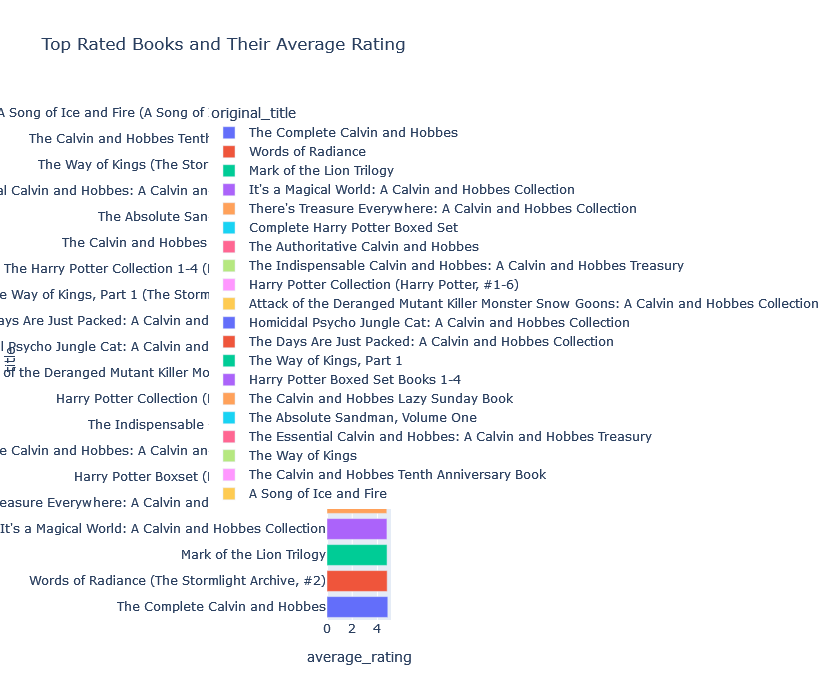

In [72]:
highly_rated = books_dataset.sort_values('average_rating', ascending= False)

highly_rated_20 = highly_rated[0:20]

fig = px.bar(highly_rated_20, x="average_rating", y="title", title='Top Rated Books and Their Average Rating',
             orientation='h', color='original_title', width=1500, height=700)
fig.show()


## Most Rated Authors

Most popular authors as determined by the number of ratings their most popular books accrued in the dataset.

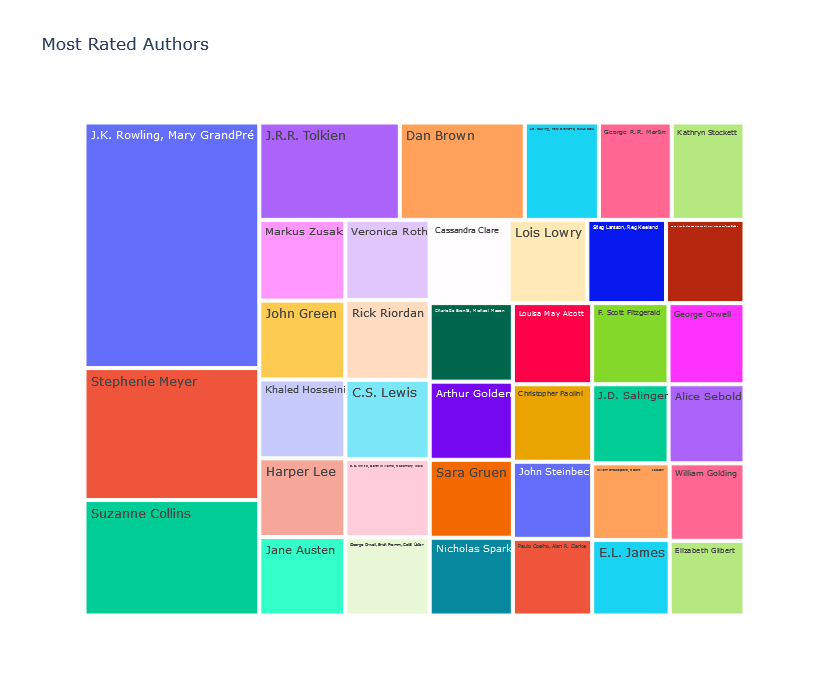

In [73]:
#top_auth = most_rated.drop_duplicates(subset='authors', keep='first')
top_auth = most_rated.sort_values('ratings_count', ascending=False)
top_50_auth = top_auth[:50]
fig = px.treemap(top_50_auth, path=['authors'], values='average_rating',title='Most Rated Authors', width=1000, height=700)
fig.show()

In the above treemap we can see which authors appear most freqeuently among books sorted for the highest ratings count when filtered to the top 50 books with the most ratings. Popular series authors appear prominently in the chart as they have multiple books  within the top 50 most rated titles and  aggregated together they claim a larger portion of the chart. The tree map has added the average_rating for each title entry within the top 50 together to give for example J.R.R Tolkien an average rating of 8.59, where until now we've been dealing with ratings strictly out of 5 stars. This is not an issue as we are mainly using this to visualize which authors appear most frequently in the top 50 most rated titles.

# Further Analysis 

### Correaltion Matrix to search for Relationships 

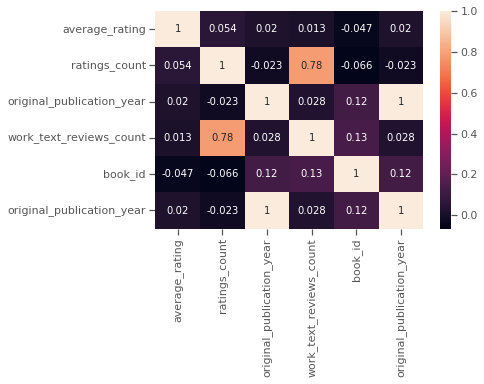

In [74]:
variables = books_dataset[['average_rating','ratings_count', 'original_publication_year', 'original_title', 'work_text_reviews_count','book_id','original_publication_year']]
corr_plot = sns.heatmap(variables.corr(), annot=True)
plt.show()

As seen above in the Correlation Matrix most of the variables have only a small linear correlation between each other and not to any significant extent meaning we can say that the meta-variables associated with a book do no have much of an impact on the actual rating so much so as the actual quality of the content of the book. We do see a stronger pearson's correlation coefficient between work_text_reviews_count and ratings_count with $r=0.78$, showing a strong linear correlation between the two variables. This is not surprising as we could already expect the number of text reviews to increase as the number of users giving books a star rating increased. 

The correlation matrix above is a good way to check for potential multicollinearity problems, since one of the main assumptions of multiple linear regression is that none of the independent variables are highly correlated with each other.

### Relationship between the Number of Ratings and the Average Rating

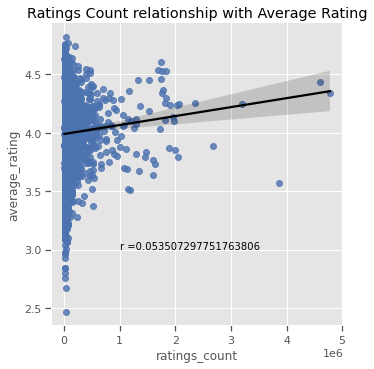

In [75]:
sns.lmplot(x='ratings_count', y='average_rating', data=books_dataset, line_kws={'color': 'black'})
corr_coef_data = books_dataset['ratings_count'].corr(books_dataset['average_rating'])

plt.text(1*10**6, 3, 'r =' +str(corr_coef_data))
plt.title('Ratings Count relationship with Average Rating')
plt.show()



We can further examine whether the popularity, meaning in this case the number of ratings a book has recieved, has any association with the average rating the book is given by plotting a linear regression model between the ratings_count and the average_rating column of the books_dataset. The correlation coefficient was found to be $r=0.0535$ showing very little linear association is to be found with respect to the ratings_counts effect on the average_rating of a book, this is somewhat interesting as it could be thought that more popular books i.e. books with more ratings would have a bias towards a significantly higher average_rating seeing as for a book to stand out and be more popular it could be expected to be favored by the user base. 

### Frequent Readers Effect on Book Rating

Lets take a look at the effect frequent reading has on the overall average rating given to the books each user has read.

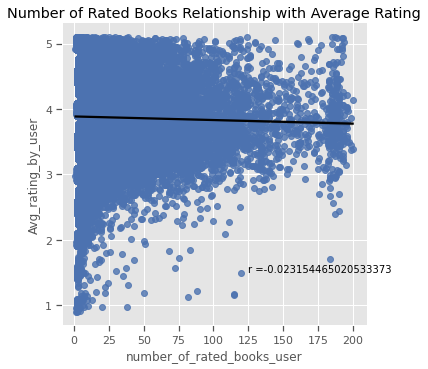

In [76]:
#Grouping the Ratings for each user and their average rating
ratings_by_user = ratings_final.groupby(['user_id'])['rating'].count()
avg_ratings_by_user = ratings_final.groupby(['user_id'])['rating'].mean()

#Create Df for lmplot
freq_raters = { 'number_of_rated_books_user':ratings_by_user, 'Avg_rating_by_user':avg_ratings_by_user}
fq_rate_df = pd.DataFrame(freq_raters)

#Create linear model
sns.lmplot(x='number_of_rated_books_user', y='Avg_rating_by_user', data =fq_rate_df, x_jitter=.1, y_jitter=.1, line_kws={'color': 'black'})

#Find correlation coeff
corr_coef_fq_rate = fq_rate_df['number_of_rated_books_user'].corr(fq_rate_df['Avg_rating_by_user'])

plt.text(125, 1.5, 'r =' +str(corr_coef_fq_rate))
plt.title('Number of Rated Books Relationship with Average Rating')
plt.show()

There is a slight negative linear correlation  as seen by correlation coefficient, $r=- 0.0231$, so nothing significant, but it may lend creedence to the belief that as readers have read more books they become more critical in their ratings and as such rate books slightly lower than the typical user.

# How Do Sequels Compare to the Original?

In [77]:
#new df to add col with cleaned up title
books_dataset_new = books_dataset

#Extract and clean title series to include only title series name
books_dataset_new['title_series']= books_dataset_new['title'].str.extract (r"\((.*,)")
books_dataset_new['title_series']= books_dataset_new['title_series'].str.split (pat=',').str[0]

#extract the number in seris and assign it a column
books_dataset_new['num_series']= books_dataset_new['title'].str.extract(r"(\d)")
book_series = books_dataset_new.dropna()

We now have a new dataframe book_series with a new columns containing only the title_series name and an additional column with the num_series that encodes where the book falls in the given series. We can now procced to group the title series together to analyze the number of books in a given series and the average rating of books within a given series.

In [78]:
book_series.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,title_series,num_series
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,The Hunger Games,1
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,Harry Potter,1
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,Twilight,1
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,"Angels & Demons (Robert Langdon, #1)",en-CA,3.85,2001311,2078754,25112,77841,145740,458429,716569,680175,Robert Langdon,1
11,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,"Divergent (Divergent, #1)",eng,4.24,1903563,2216814,101023,36315,82870,310297,673028,1114304,Divergent,1


In [79]:
no_of_books_series = book_series.groupby(['title_series'])['num_series'].count()
avg_rating_of_series = book_series.groupby(['title_series'])['average_rating'].mean()

In [80]:
no_of_books_series.sort_values(ascending=False)

title_series
In Death               40
Discworld              37
Stephanie Plum         25
Hercule Poirot         25
Anita Blake            22
                       ..
Rocky Pelligrino        1
Rosato & Associates     1
Rosemary Beach          1
Firstborn               1
Ορέστεια                1
Name: num_series, Length: 1349, dtype: int64

In [81]:
avg_rating_of_series.sort_values(ascending=False)

title_series
The Stormlight Archive      4.705
The Kingkiller Chronicle    4.560
The Fitz and The Fool       4.530
Mark of the Lion            4.530
Captive Prince              4.500
                            ...  
Andy Brazil                 3.280
Ghostgirl                   3.280
The Wideacre Trilogy        3.280
The Devil Wears Prada       3.270
Star Wars: Aftermath        3.150
Name: average_rating, Length: 1349, dtype: float64

In [82]:
final_book_series = pd.merge(left=no_of_books_series,right=avg_rating_of_series, on='title_series')
final_book_series.sort_values('average_rating', ascending=False)

,num_series,average_rating
title_series,,
The Stormlight Archive,2,4.705
The Kingkiller Chronicle,2,4.560
The Fitz and The Fool,1,4.530
Mark of the Lion,3,4.530
Captive Prince,1,4.500
...,...,...
Andy Brazil,1,3.280
Ghostgirl,1,3.280
The Wideacre Trilogy,1,3.280


We can now create a linear regression plot between the num_series representing the number of books in a given series and the average_rating, meaning the rating of the series as a whole. 

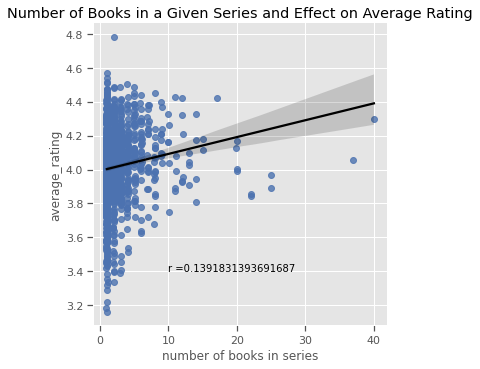

In [83]:
sns.lmplot(x='num_series', y='average_rating', data =final_book_series, x_jitter=.1, y_jitter=.1, line_kws={'color': 'black'})

corr_coef_bk = final_book_series['num_series'].corr(final_book_series['average_rating'])

plt.text(10, 3.4, 'r =' +str(corr_coef_bk))
plt.title('Number of Books in a Given Series and Effect on Average Rating')
plt.xlabel('number of books in series')
plt.show()

Above we can see the effect the number of books in a given series has on the overall series rating, and it seems that series with a larger number of books do tend to have a slightly higher average rating. This suggests that as a book series goes on it continues to have high ratings among fans, which begs the question if this differs from the common adage with regards to film where it is commonly believed that the sequels never live up to the original. 

We can examine whether this belief with regards to films also applies to novels by plotting boxplots of books with no more than 3 volumes in their series to ascertain whether ratings increase or decrease upon publication of subsequent books. 

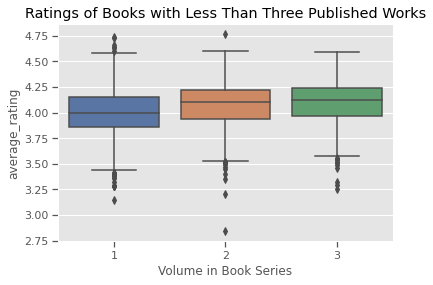

In [103]:


#Exclude 0 because of  0.5 comic-book/manga issues and prequel situations
book_series_volume = book_series[(book_series.num_series.astype(int) <= 3) & (book_series.num_series.astype(int) != 0)]
book_series_volume = book_series_volume[['title_series', 'num_series', 'average_rating']]
sns.boxplot(x='num_series', y='average_rating', data=book_series_volume)
plt.title('Ratings of Books with Less Than Three Published Works')
plt.xlabel('Volume in Book Series')
plt.show()

As seen in the figure above, the film adage about sequels being perceived worse than the original does not seem to hold true with regards to novels. In the series with no more than 3 novels it seems that each novel on average goes on to receive a slightly higher rating than the original.



# Significance Testing 

Before performing any further analysis to determine whether there is a statistically significant difference in the mean average rating of books over a trilogy to test whether this old adage with regards to movies holds true to novels. We must first subset the data once again to this time only include books with three published books in a series so that we are only working with books that are part of a current trilogy. 

In [97]:
trilogies = book_series_volume.groupby('title_series')['num_series'].count().to_frame('series_count').reset_index()
trilogies = trilogies[trilogies.series_count == 3]

trilogies_df = pd.merge(book_series_volume, trilogies, how='inner', on ='title_series') 
trilogies_df

,title_series,num_series,average_rating,series_count
0,Robert Langdon,1,3.85,3
1,Robert Langdon,2,3.79,3
2,Robert Langdon,3,3.66,3
3,Millennium,1,4.11,3
4,Millennium,2,4.22,3
...,...,...,...,...
772,Imriel's Trilogy,2,4.24,3
773,Imriel's Trilogy,3,4.30,3
774,The Years of Lyndon Johnson,3,4.41,3
775,The Years of Lyndon Johnson,1,4.42,3


## ANOVA 

ANOVA test can be used to compare the means of more than two groups whereas the t-test is used when comparing only two groups. 

Here we will be testing whether the mean average rating across volumes in a trilogy are equal or whether there is statistically significant difference in at least one of the volume's mean average ratings. 

$H_0: \mu_{volume_1}=\mu_{volume_2}=\mu_{volume_3}$ 

$H_a: \mu_1\neq\mu_2\neq\mu_3$

In [87]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#ANOVA analysis as glm where C denotes categorical data 
model = ols('average_rating ~ C(num_series)', data=trilogies_df).fit()

#typ is w.r.t SS typ1==typ2
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(num_series),1.298170,2.0,15.243862,3.211705e-07
Residual,32.956997,774.0,NaN,NaN


From the One way ANOVA test above we can see that the p-value is less than 0.05 and therfore can reject the null hypothesis, that is we can reject the null hypothesis that there is no difference in the mean average rating for each volume in a trilogy. Provided the model assumptions below hold we can say that at least one of the mean average ratings for a volume in a series differs in a statistically significant way.

### Test Model Assumptions

ANOVA assumes that the residuals are approximately normally distributed(Shapiro Wilk Test or Histogram), Variances are equal between groups (Levene's or Bartlett's Test), observations are sampled independently (each subject has only one response), and the dependent variable must be continuous. 

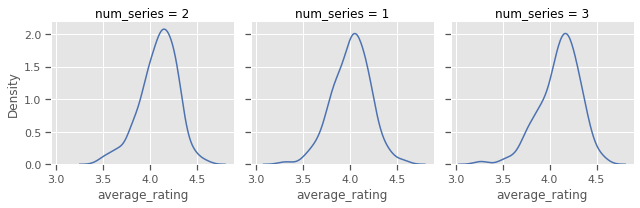

In [95]:
g = sns.FacetGrid(trilogies_df, col='num_series', col_wrap = 3) 
g.map(sns.kdeplot, 'average_rating')

### Q-Q Plot

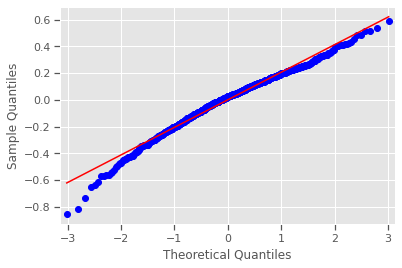

In [101]:
res = model.resid
fig = sm.qqplot(res, line ='s') 
plt.show()

###  Histogram of Residuals

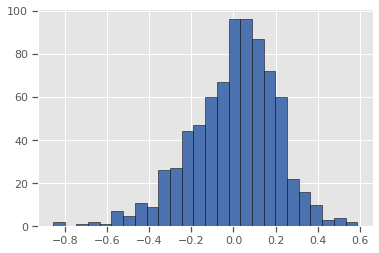

In [93]:
plt.hist(model.resid, bins='auto', histtype = 'bar' , ec = 'k') 
plt.show()

### Shapiro Wilk 

The Shapiro Wilk test can be used to ascertain whether a given sample is normally distributed.

$H_0:$ The sample is normally distributed

$H_a:$ The sample is not normally distributed

In [90]:
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue) 

0.9827991127967834 6.470307312156365e-08


The Shapiro Wilk test suggests the data is not normally distributed because the p-value is less than 0.05. The Shapiro-Wilk teset can reject normality when a large sample size has been drawn from a largely normal sample; with a large enough sample size even slight deviations from the normal distribution can be picked up and thus be determined to be non-parametric when drawn from a largely normal sample. 

ANOVA is fairly robust against violations of the normality assumption when the sample sizes are large enough, in this case we can disregard the Shapiro Wilk Test and rely on the histogram of the residuals and Q-Q plot to determine normality of the data or proceed to use a Non-parametric test on the data. 



## Kruskal-Wallis Non-Parametric Test 

To be certain that there is a difference between the three groups seen in the ANOVA analysis above we can conduct a Kruskal Wallis Test which does not rely on assuming the data has been sampled from a normal distribution.

Kruskal-Wallis test is the non-parametric equivalent of a one way ANOVA test and is used to see if there is a statistically significant difference between the medians of the three or more groups. 

Kruskal-Wallis test assumes that the response variable is continuous or ordinal, observations are independent of each other, and that distributions have similar shape. In this case all of these assumptions are met for the purposes of our analyses. 

$H_0$: The median average rating across volumes in a series are equal

$H_a$: At least one of the median average ratings across volumes in a series differs 

In [92]:
a = trilogies_df[trilogies_df.num_series.astype(int) == 1]
b = trilogies_df[trilogies_df.num_series.astype(int) == 2]
c = trilogies_df[trilogies_df.num_series.astype(int) == 3]

x = a.average_rating
y = b.average_rating
z = c.average_rating
stats.kruskal(x,y,z)



KruskalResult(statistic=36.65621244886282, pvalue=1.0969948860478856e-08)

As the p-value is less than our specified $\alpha=0.05$ we can therefore reject the null hypothesis and conclude that there is enough evidence to conclude there is a statistically significant difference between the median average ratings of volumes across trilogies.

If we want to determine further in group comparisons we could continue with further post-hoc testing to determine exactly which groups differ from each other. 

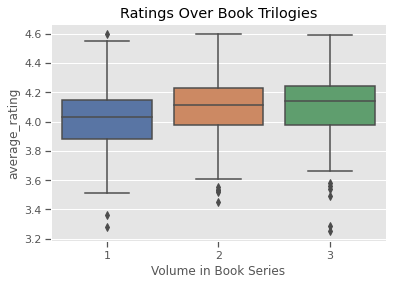

In [98]:
sns.boxplot(x='num_series', y='average_rating', data=trilogies_df)
plt.title('Ratings Over Book Trilogies')
plt.xlabel('Volume in Book Series')
plt.show()

# Conclusion

After performing a Kruskal-Wallis test we can say that there is a statistically significant difference in the median average rating between volumes in book trilogies.  As seen in the figure above, the film adage about sequels being perceived worse than the original does not seem to hold true with regards to novels. 

There could be any number of reasons for this result, but it does not necessarily mean the sequels are indeed better than the original. One possible counterpoint to this narrative would be that as a series goes on it's fanbase shrinks leaving only the most devout fans left to rate the later books in a series which in turn leads to a selection bias and thus the average rating could be skewed towards being higher than the original novel. 

Authors can use this insight when deciding what types of books to write, it seems that choosing to develop an overarching series with multiple books aids in producing higher rated novels. This seems like it is also partly dependent on developing a devout fan base that is willing continue on with a series which may skew ratings and help raise the author's later works in the series public perception. 